![mod cloth logo](img/modcloth-logo.png )

# ModCloth Dress Fit Prediction (Part-2)

This notebook talks about how to predict the dress fitness prediction. The dataset that is being used is scraped from modcloth dataset. This is the second part of the Notebook Series. The first notebook does the Exploratory Data Analysis and save the data in a pickle file. In this notebook we use various features to predict if a dress will be
- small
- fit
- large


['small', 'fit','large'],[0,1,2]

In [1]:
import os
import numpy as np
import pandas as pd
import sklearn.preprocessing
import zipfile


#######################
#       imports       #
#######################
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import itertools
import pickle
from mlxtend.plotting import plot_decision_regions
from mlxtend.classifier import StackingClassifier # <-- note: this is not from sklearn!

from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import (RandomForestClassifier, ExtraTreesClassifier, VotingClassifier, 
                              AdaBoostClassifier, BaggingRegressor)

from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, make_scorer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate
from sklearn.datasets.california_housing import fetch_california_housing
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score

sns.set_style("whitegrid")
%matplotlib inline
# make prettier plots
%config InlineBackend.figure_format = 'svg' 

In [2]:
!ls dataframe
model_df = pd.read_pickle("dataframe/modcloth_selected.pkl")

modcloth_renamed.pkl	   sel_modcloth_df_final.pkl  test
modcloth_selected.pkl	   sel_modcloth_df.pkl	      train
renttherunway_renamed.pkl  sel_modcloth_df_qual.pkl


In [3]:
selmodcloth_df = pd.read_pickle("dataframe/sel_modcloth_df_final.pkl")

In [4]:
target_df = pd.DataFrame(selmodcloth_df.fit_num)

In [5]:
features_df = selmodcloth_df.drop(columns=["fit_num"], axis=1)

In [6]:
# recommend from 20-30 for test and impabalanced classes
X_train, X_test, y_train, y_test = train_test_split(features_df, target_df, test_size=0.1, random_state=42,
                                                    stratify=target_df)

In [7]:
print ("X Train size:", len(X_train))
print ("Y Train size:", len(y_train))
print ("X Test  Size:", len(X_test))
print ("Y Test  Size:", len(y_test))

X Train size: 48881
Y Train size: 48881
X Test  Size: 5432
Y Test  Size: 5432


In [8]:
!ls dataframe/test

y_test.pkl  y_train.pkl


In [9]:
y_train.fit_num.value_counts()

1    33597
2     7891
0     7393
Name: fit_num, dtype: int64

In [10]:
y_test.fit_num.value_counts()

1    3733
2     877
0     822
Name: fit_num, dtype: int64

In [11]:
clf = XGBClassifier().fit(X_train, y_train)

/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [12]:
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Model Accuracy:', {round(accuracy, 4)*100})
print (clf.score(X_test, y_test))

Model Accuracy: {69.02000000000001}
0.6901693667157585


In [13]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.49      0.03      0.05       822
           1       0.69      0.99      0.82      3733
           2       0.58      0.02      0.04       877

    accuracy                           0.69      5432
   macro avg       0.59      0.35      0.30      5432
weighted avg       0.64      0.69      0.57      5432



In [14]:
# Helper function for printing confusion matrices (see: https://gist.github.com/shaypal5/94c53d765083101efc0240d776a23823)

# prints confusion matrix as a heatmap which is nicer to visaulize

def print_confusion_matrix(confusion_matrix, class_names, figsize = (10,7), fontsize=18):
    """Prints a confusion matrix, as returned by sklearn.metrics.confusion_matrix, as a heatmap.
    
    Arguments
    ---------
    confusion_matrix: numpy.ndarray
        The numpy.ndarray object returned from a call to sklearn.metrics.confusion_matrix. 
        Similarly constructed ndarrays can also be used.
    class_names: list
        An ordered list of class names, in the order they index the given confusion matrix.
    figsize: tuple
        A 2-long tuple, the first value determining the horizontal size of the ouputted figure,
        the second determining the vertical size. Defaults to (10,7).
    fontsize: int
        Font size for axes labels. Defaults to 14.
        
    Returns
    -------
    matplotlib.figure.Figure
        The resulting confusion matrix figure
    """
    df_cm = pd.DataFrame(confusion_matrix, index=class_names, columns=class_names, )
    fig = plt.figure(figsize=figsize)
    try:
        heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
    except ValueError:
        raise ValueError("Confusion matrix values must be integers.")
    heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
    heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return fig

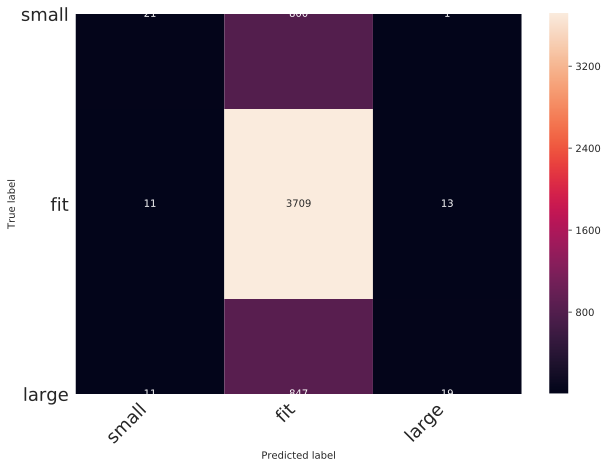

In [15]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred)
cm = print_confusion_matrix(conf_mat, ['small', 'fit','large'])

In [16]:
sklearn.metrics.SCORERS.keys()

dict_keys(['explained_variance', 'r2', 'max_error', 'neg_median_absolute_error', 'neg_mean_absolute_error', 'neg_mean_squared_error', 'neg_mean_squared_log_error', 'accuracy', 'roc_auc', 'balanced_accuracy', 'average_precision', 'neg_log_loss', 'brier_score_loss', 'adjusted_rand_score', 'homogeneity_score', 'completeness_score', 'v_measure_score', 'mutual_info_score', 'adjusted_mutual_info_score', 'normalized_mutual_info_score', 'fowlkes_mallows_score', 'precision', 'precision_macro', 'precision_micro', 'precision_samples', 'precision_weighted', 'recall', 'recall_macro', 'recall_micro', 'recall_samples', 'recall_weighted', 'f1', 'f1_macro', 'f1_micro', 'f1_samples', 'f1_weighted', 'jaccard', 'jaccard_macro', 'jaccard_micro', 'jaccard_samples', 'jaccard_weighted'])

In [19]:
xgb_model = XGBClassifier()
parameters = {#'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['multi:softmax'],
              'num_class':[3],
              'learning_rate': [0.05], #so called `eta` value
              'max_depth': [10],
              'min_child_weight': [11],
              'verbose': [2],
              'subsample': [0.8],
              'colsample_bytree': [0.7],
              'n_estimators': [1000], #number of trees, change it to 1000 for better results
              'seed': [1337]}
clf = GridSearchCV(xgb_model, parameters, n_jobs=5, 
                   cv=5, 
                   scoring='accuracy',
                   verbose=2, refit=True)
clf.fit(X_train, y_train)

# XGBClassifier(colsample_bytree-0.7,
#  learning_rate= 0.05,
#  max_depth= 10,
#  min_child_weight= 11,
#  n_estimators=1000,
#  num_class =3,
#  objective='multi:softmax',
#  seed = 1337,
#  subsample= 0.8,
#  verbose2

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done   2 out of   5 | elapsed:  2.6min remaining:  3.9min
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min remaining:    0.0s
[Parallel(n_jobs=5)]: Done   5 out of   5 | elapsed:  2.6min finished
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/site-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_l...
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=5,
             param_grid={'colsample_bytree': [0.7], 'learning_rate': [0.05],
                         'max_depth': [10], 'min_child_weight': [11],
                         'n_estimators': [1000], 'num_class': [3],
                         'objective': ['mu

In [20]:
xgb_model = XGBClassifier(colsample_bytree=0.7,
 learning_rate= 0.05,
 max_depth= 10,
 min_child_weight= 11,
 n_estimators=1000,
 num_class =3,
 objective='multi:softmax',
 seed = 1337,
 subsample=0.8,
 verbose=2)

In [21]:
xgb_model.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0,
              learning_rate=0.05, max_delta_step=0, max_depth=10,
              min_child_weight=11, missing=None, n_estimators=1000, n_jobs=1,
              nthread=None, num_class=3, objective='multi:softprob',
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=1337, silent=None, subsample=0.8, verbose=2, verbosity=1)

In [22]:
xgb_model.score(X_test,y_test)

0.6772827687776142

In [23]:
xgb_model.feature_importances_

array([0.06794594, 0.07259199, 0.10763244, 0.08552342, 0.06945206,
       0.07472338, 0.07102764, 0.06902849, 0.083657  , 0.07369363,
       0.07893139, 0.08002209, 0.0657706 ], dtype=float32)

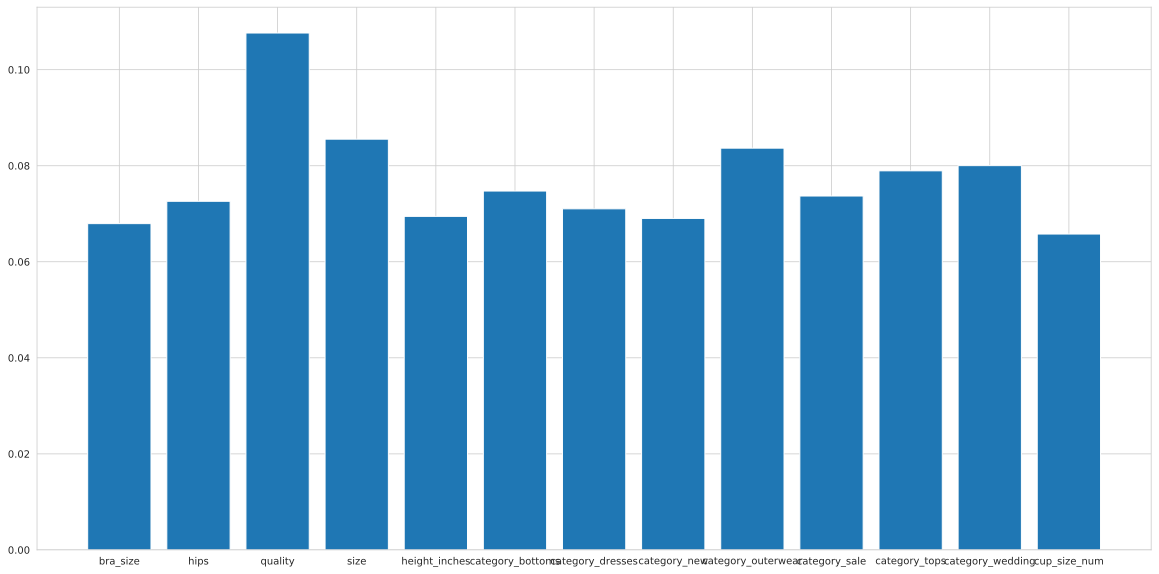

In [26]:
plt.figure(figsize=(20,10))
plt.bar(["bra_size","hips","quality","size","height_inches","category_bottoms", "category_dresses","category_new",
        "category_outerwear","category_sale","category_tops","category_wedding","cup_size_num"], 
        xgb_model.feature_importances_)
plt.show()

In [27]:
features_df.columns

Index(['bra_size', 'hips', 'quality', 'size', 'height_inches',
       'category_bottoms', 'category_dresses', 'category_new',
       'category_outerwear', 'category_sale', 'category_tops',
       'category_wedding', 'cup_size_num'],
      dtype='object')

In [28]:
print(classification_report(y_test, xgb_model.predict(X_test)))

              precision    recall  f1-score   support

           0       0.36      0.12      0.18       822
           1       0.71      0.93      0.81      3733
           2       0.36      0.10      0.16       877

    accuracy                           0.68      5432
   macro avg       0.48      0.39      0.38      5432
weighted avg       0.60      0.68      0.61      5432



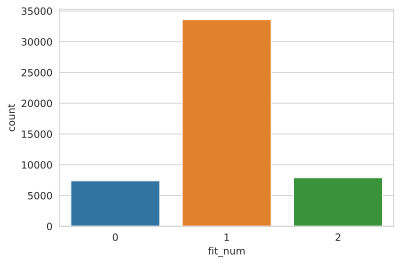

In [29]:
sns.countplot(y_train.fit_num)

In [30]:
y_train.fit_num.value_counts()

1    33597
2     7891
0     7393
Name: fit_num, dtype: int64

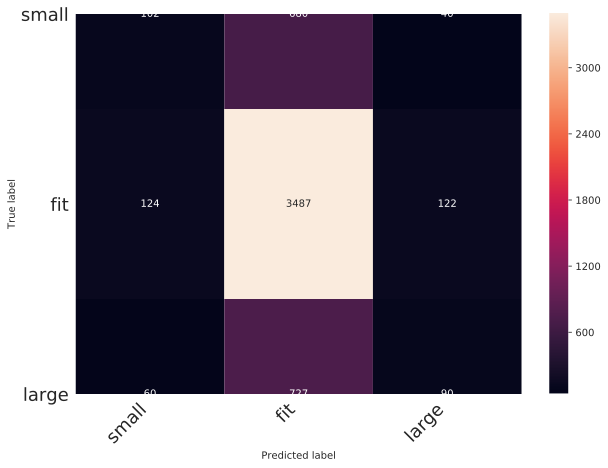

In [31]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=xgb_model.predict(X_test))
cm = print_confusion_matrix(conf_mat, ['small', 'fit','large'])

In [32]:
clf.best_params_

{'colsample_bytree': 0.7,
 'learning_rate': 0.05,
 'max_depth': 10,
 'min_child_weight': 11,
 'n_estimators': 1000,
 'num_class': 3,
 'objective': 'multi:softmax',
 'seed': 1337,
 'subsample': 0.8,
 'verbose': 2}

In [34]:
from sklearn.metrics import precision_score, recall_score, precision_recall_curve,f1_score, fbeta_score,classification_report
y_predict = clf.predict(X_test)
print("Default threshold:")
print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict, average="micro"), 
                                                     recall_score(y_test, y_predict,average="micro")))

print("Precision: {:6.4f},   Recall: {:6.4f}".format(precision_score(y_test, y_predict, average="macro"), 
                                                     recall_score(y_test, y_predict,average="macro")))

Default threshold:
Precision: 0.6773,   Recall: 0.6773
Precision: 0.4754,   Recall: 0.3869


In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.36      0.12      0.18       822
           1       0.71      0.93      0.81      3733
           2       0.36      0.10      0.16       877

    accuracy                           0.68      5432
   macro avg       0.48      0.39      0.38      5432
weighted avg       0.60      0.68      0.61      5432



In [36]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_random)
cm = print_confusion_matrix(conf_mat, ['small', 'fit','large'])

NameError: name 'y_pred_random' is not defined

In [37]:
y_predict = pd.DataFrame(y_predict, columns=["prediction"])

In [38]:
y_predict.prediction.value_counts()

1    4894
0     286
2     252
Name: prediction, dtype: int64

In [39]:
y_test.fit_num.value_counts()

1    3733
2     877
0     822
Name: fit_num, dtype: int64

In [40]:
# We can also use the probabilities to make a curve showing us how recall 
# and thresholds trade off 

precision_curve, recall_curve, threshold_curve = precision_recall_curve(y_test, clf.predict_proba(X_test) )

plt.figure(dpi=80)
plt.plot(threshold_curve, precision_curve[1:],label='precision')
plt.plot(threshold_curve, recall_curve[1:], label='recall')
plt.legend(loc='lower left')
plt.xlabel('Threshold (above this probability, label as fraud)');
plt.title('Precision and Recall Curves');

ValueError: multiclass format is not supported

In [41]:
f1_score(y_test, y_predict, average='micro')

0.6772827687776142

In [42]:
from sklearn.metrics import log_loss
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, clf.predict_proba(X_test))))

Log-loss on dummy classifier: 0.8207


In [43]:
clf.predict_proba(X_test)

array([[0.23081706, 0.64430135, 0.12488154],
       [0.16053416, 0.74008566, 0.09938023],
       [0.09466069, 0.8309521 , 0.07438718],
       ...,
       [0.09390233, 0.78827596, 0.11782169],
       [0.06126695, 0.7922101 , 0.14652295],
       [0.32403642, 0.5570403 , 0.11892331]], dtype=float32)

In [44]:
# Lets Try Linear Modelling

In [45]:
def quick_test(model, X_train, y_train, X_test, y_test):
    #xtrain, xtest, ytrain, ytest = train_test_split(X, y, test_size=0.3)
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

def quick_test_afew_times(model, X, y,x1,y1, n=10):
    return np.mean([quick_test(model, X, y,x1,y1) for j in range(n)])



### Linear SVM

In [ ]:
linearsvc = LainearSVC()
# Do the test 10 times with a LinearSVC and get the average score
quick_test_afew_times(linearsvc, X_train, y_train, X_test,y_test)

## Decision Trees

In [18]:
for j in range(3,10): 
 decisiontree = DecisionTreeClassifier(max_depth=j)
 print quick_test_afew_times(decisiontree,X_train, y_train, X_test,y_test)

NameError: name 'quick_test_afew_times' is not defined

## Random Forest with Multi Class Classifier

In [17]:
from sklearn.multioutput import MultiOutputClassifier
# This takes a very long time to train
# The numver is 0.6481526942432797 at estimator of 100
#for j in range(1000,2000,500):
randomforest = RandomForestClassifier(n_estimators=1500)
multi_target_forest = MultiOutputClassifier(randomforest)
multi_target_forest.fit(X_train, y_train)

MultiOutputClassifier(estimator=RandomForestClassifier(bootstrap=True,
                                                       class_weight=None,
                                                       criterion='gini',
                                                       max_depth=None,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=1,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       n_estimators=1500,
                                                       n_jobs=None,
                   

In [18]:
feat_impts = [] 
for clf in multi_target_forest.estimators_:
    feat_impts.append(clf.feature_importances_)


In [19]:
X_train.columns

Index(['bra_size', 'hips', 'quality', 'size', 'height_inches',
       'category_bottoms', 'category_dresses', 'category_new',
       'category_outerwear', 'category_sale', 'category_tops',
       'category_wedding', 'cup_size_num'],
      dtype='object')

In [20]:
feat_impts

[array([0.09703157, 0.26245447, 0.06321089, 0.12190357, 0.26225115,
        0.00742531, 0.00705659, 0.00794175, 0.005535  , 0.00457509,
        0.00731178, 0.00092008, 0.15238276])]

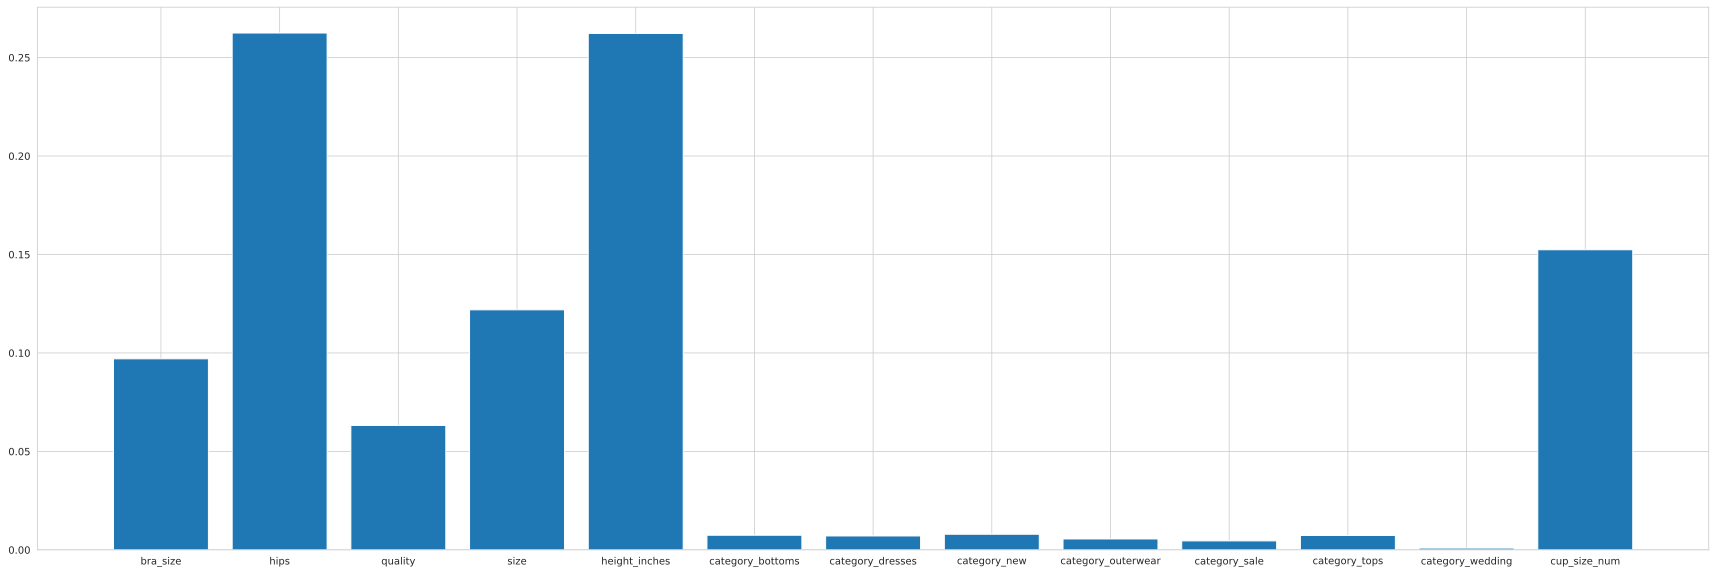

<Figure size 432x288 with 0 Axes>

In [24]:
plt.figure(figsize=(30,10))
plt.bar(["bra_size","hips","quality","size","height_inches","category_bottoms", "category_dresses","category_new",
        "category_outerwear","category_sale","category_tops","category_wedding","cup_size_num"], 
        feat_impts[0])
plt.show()
plt.savefig("FeatureImportances.jpeg")

In [50]:
multi_target_forest.score(X_test, y_test)

0.6502209131075111

In [24]:
y_pred_random = pd.DataFrame(multi_target_forest.predict(X_test), columns=["output"])

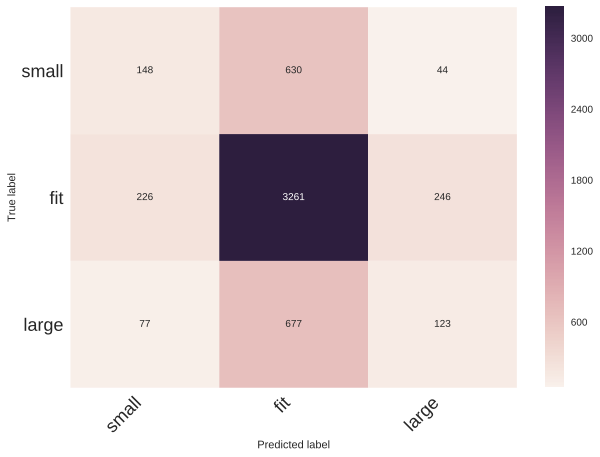

In [25]:
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_pred_random)
cm = print_confusion_matrix(conf_mat, ['small', 'fit','large'])

In [26]:
print(classification_report(y_test, y_pred_random))

              precision    recall  f1-score   support

           0       0.33      0.18      0.23       822
           1       0.71      0.87      0.79      3733
           2       0.30      0.14      0.19       877

   micro avg       0.65      0.65      0.65      5432
   macro avg       0.45      0.40      0.40      5432
weighted avg       0.59      0.65      0.61      5432



### ROC Curver

In [ ]:
from sklearn.metrics import roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import label_binarize

# Binarize the output
y = label_binarize(target_df, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(features_df, y, test_size=0.2, random_state=42,
                                                    stratify=target_df)

fpr = dict()
tpr = dict()
roc_auc = dict()
n_classes = 3
randomforest = RandomForestClassifier(n_estimators=1000)
multi_target_forest = OneVsRestClassifier(randomforest)
#multi_target_forest.fit(X_train, y_train)
y_score = multi_target_forest.fit(X_train, y_train)
#y_score = multi_target_forest.



In [ ]:
y = label_binarize(target_df, classes=[0, 1, 2])
n_classes = y.shape[1]

X_train, X_test, y_train, y_test = train_test_split(features_df,target_df, test_size=0.1, random_state=42,
                                                    stratify=target_df)



In [ ]:
y_proba_pre =  multi_target_forest.predict(X_test)

In [ ]:
y_proba_pre

In [ ]:
len(multi_target_forest.predict_proba(X_test)[0][:,0])

In [ ]:
len(y_pred_random[y_pred_random["output"] == 0].as_matrix())

In [ ]:


roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test[y_test["fit_num"] == i].as_matrix(), multi_target_forest.predict_proba(X_test)[0][:,i])
    roc_auc[i] = auc(fpr[i], tpr[i])


In [ ]:
# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_proba_pre.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


In [ ]:
plt.figure()
lw = 2
plt.plot(fpr[0], tpr[0], color='red',
         lw=lw, label='Small (area = %0.2f)' % roc_auc[0])
plt.plot(fpr[1], tpr[1], color='darkorange',
         lw=lw, label='Fit (area = %0.2f)' % roc_auc[1])
plt.plot(fpr[2], tpr[2], color='green',
         lw=lw, label='Large (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [ ]:
print(classification_report(y_test, multi_target_forest.predict(X_test)))

In [ ]:
y_pred_random.output.value_counts()

In [ ]:
y_test.

In [ ]:
y_test.fit_num.value_counts()

### Support Vector Machines

In [ ]:
#Taking too long to run
s2 = SVC(gamma="scale")
quick_test_afew_times(s2, X_train, y_train, X_test,y_test)

### Logistic Regression with Multinomial Class

In [74]:
logit = LogisticRegression(C = 0.01,solver="lbfgs",multi_class="multinomial")
logit.fit(X_train, y_train)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))
print("Log-loss on dummy classifier: {:6.4f}".format(log_loss(y_test, logit.predict_proba(X_test))))

ValueError: bad input shape (48881, 3)

In [ ]:
print(classification_report(y_test, logit.predict(X_test)))

In [ ]:
y_train.iloc[:,0].value_counts()

In [ ]:
33597.0/(33597+ 15700)

### K Nearest Neoghbors

In [65]:
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)
print("The score for kNN is")
print("Training: {:6.2f}%".format(100*knn.score(X_train, y_train)))
print("Test set: {:6.2f}%".format(100*knn.score(X_test, y_test)))

The score for kNN is
Training:  60.93%
Test set:   3.30%


In [66]:
print(classification_report(y_test, knn.predict(X_test)))

              precision    recall  f1-score   support

           0       0.66      0.05      0.09      3733
           1       0.00      0.00      0.00       877
           2       0.38      0.01      0.01       822

   micro avg       0.64      0.03      0.06      5432
   macro avg       0.34      0.02      0.03      5432
weighted avg       0.51      0.03      0.06      5432
 samples avg       0.03      0.03      0.03      5432



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels.
  'precision', 'predicted', average, warn_for)


In [ ]:
#lr_model = linear_model.LogisticRegression(solver="lbfgs")
nb_model = naive_bayes.GaussianNB()
knn_model = neighbors.KNeighborsClassifier()
svc_model = svm.SVC(probability=True, gamma="scale")
rf_model = ensemble.RandomForestClassifier(n_estimators=100)
et_model = ensemble.ExtraTreesClassifier(n_estimators=100)
ada_model = ensemble.AdaBoostClassifier()

models = ["lr_model", "nb_model", "knn_model", "svc_model", "rf_model", "et_model", "ada_model"]

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN

In [ ]:
logit.intercept_

In [ ]:
X_train.columns

In [ ]:
logit.coef_

In [ ]:
from imblearn.over_sampling import SMOTE, ADASYN
sm = SMOTE()
adsyn = ADASYN()
std = StandardScaler()
X_train = std.fit_transform(X_train)
X_test = std.fit_transform(X_test)
X_train_oversampled, y_train_oversampled = sm.fit_sample(X_train, y_train)
X_train_oversampled_adsyn, y_train_oversampled_adsyn = adsyn.fit_sample(X_train, y_train)

In [ ]:
y_train_smote = pd.DataFrame(y_train_oversampled, columns=["fit_num"])

In [ ]:
from sklearn.multioutput import MultiOutputClassifier
# This takes a very long time to train
# The numver is 0.6481526942432797 at estimator of 100
for j in range(1000,2000,500):
    randomforest = RandomForestClassifier(n_estimators=j)
    multi_target_forest = MultiOutputClassifier(randomforest)
    multi_target_forest.fit(X_train_oversampled, y_train_smote)
    print multi_target_forest.score(X_test,y_test)

In [ ]:
print(classification_report(y_test,multi_target_forest.predict(X_test)))

In [ ]:
df = pd.DataFrame(y_train_oversampled, columns=["y"])
print df.y.value_counts()
print len(X_train_oversampled)

In [ ]:
X_train_oversampled[10]

In [ ]:
logit.fit(X_train_oversampled, y_train_oversampled)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train_oversampled, y_train_oversampled)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

In [ ]:
logit.fit(X_train_oversampled_adsyn, y_train_oversampled_adsyn)
print("The score for logistic regression is")
print("Training: {:6.2f}%".format(100*logit.score(X_train_oversampled, y_train_oversampled)))
print("Test set: {:6.2f}%".format(100*logit.score(X_test, y_test)))

In [ ]:
y_pred = logit.predict(X_test)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_sample(X_train,y_train)

In [ ]:
clf_ros = SVC().fit(X_resampled, y_resampled)

In [ ]:
clf_ros.score(X_test, y_test)

In [ ]:
from catboost import CatBoostClassifier, Pool

In [ ]:
model = CatBoostClassifier(iterations=1000,
                           depth=10,
                           learning_rate=0.0001,
                            loss_function='MultiClass',
                           classes_count=3,
                           #loss_function='Logloss',
                           eval_metric='Accuracy',
                           verbose=True)

In [ ]:
model.fit(X_train, y_train)
# make the prediction using the resulting model
preds_class = model.predict(X_test)
preds_proba = model.predict_proba(X_test)
print("class = ", preds_class)
print("proba = ", preds_proba)

In [ ]:
print(classification_report(y_test,preds_class))

In [ ]:
from sklearn import linear_model, naive_bayes, svm, neural_network

In [ ]:
lm = linear_model.LogisticRegression(solver='lbfgs')

In [ ]:
lm.fit(X_train, y_train)

In [ ]:
lm.score(X_test, y_test)

In [ ]:
lm.predict_proba(X_test)

In [ ]:
nn = neural_network.MLPClassifier(activation="relu")

In [ ]:
nn.fit(X_train, y_train)

In [ ]:
nn.score(X_test, y_test)

In [ ]:
y_nn_pred = nn.predict(X_test)

In [ ]:
print(classification_report(y_test,y_nn_pred))

In [ ]:
nn = neural_network.MLPClassifier(activation="identity")
nn.fit(X_train, y_train)
nn.score(X_test, y_test)

In [ ]:
svmm = svm.SVC(gamma="scale")
svmm.fit(X_train, y_train)
svmm.score(X_test, y_test)

In [ ]:
sns.heatmap(X_train)

# Neural Networks

In [27]:
X_train.head()

,bra_size,hips,quality,size,height_inches,category_bottoms,category_dresses,category_new,category_outerwear,category_sale,category_tops,category_wedding,cup_size_num
35676,34.0,34.0,5.0,8,63,0,0,1,0,0,0,0,5
20122,34.0,43.0,3.0,15,63,0,1,0,0,0,0,0,6
35831,40.0,51.0,5.0,20,66,0,0,1,0,0,0,0,4
5599,36.0,37.0,4.0,8,59,0,0,1,0,0,0,0,2
74048,36.0,35.0,5.0,4,61,1,0,0,0,0,0,0,0


In [28]:
y_train.head()

,fit_num
35676,1
20122,1
35831,1
5599,1
74048,1


In [29]:
X_train["bra_size"] = (X_train["bra_size"] - X_train["bra_size"].mean())/X_train["bra_size"].std()

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
X_train["hips"] = (X_train["hips"] - X_train["hips"].mean())/X_train["hips"].std()
X_train["height_inches"] = (X_train["height_inches"] - X_train["height_inches"].mean())/X_train["height_inches"].std()
X_train["size"] = (X_train["size"] - X_train["size"].mean())/X_train["size"].std()
X_train["quality"] = (X_train["quality"] - X_train["quality"].mean())/X_train["quality"].std()
X_train["cup_size_num"] = (X_train["cup_size_num"] - X_train["cup_size_num"].mean())/X_train["cup_size_num"].std()


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/p

In [33]:
y_test["fit_num"] = y_test["fit_num"].replace([0,1,2],['small', 'fit','large'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [34]:
from keras.utils import np_utils
#y_train["fit_num"]
y_orig_test = y_test
encoder = LabelEncoder()
encoder.fit(y_test)
y_test = encoder.transform(y_test)
y_test = np_utils.to_categorical(y_test)

Using TensorFlow backend.
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [35]:
y_train["fit_num"] = y_train["fit_num"].replace([0,1,2],['small', 'fit','large'])

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [36]:
from keras.utils import np_utils
#y_train["fit_num"]
y_orig_train = y_train
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_train = np_utils.to_categorical(y_train)

/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python2.7/dist-packages/sklearn/preprocessing/label.py:252: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [75]:
import keras
DROP = .2

ames_model = keras.Sequential([
#     keras.layers.Dropout(.1),
    keras.layers.Dense(units= 100,activation="tanh", input_shape=X_train.shape[1:]),
    keras.layers.Dropout(DROP),
    keras.layers.Dense(units= 50,activation="tanh"),
    keras.layers.Dropout(DROP),
    keras.layers.Dense(units= 25,activation="tanh"),
    keras.layers.Dropout(DROP),
    keras.layers.Dense(units=3, activation='softmax'),
])

ames_model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )
ames_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_5 (Dense)              (None, 100)               1400      
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_7 (Dense)              (None, 25)                1275      
_________________________________________________________________
dropout_6 (Dropout)          (None, 25)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 78        
Total para

In [76]:
scores = ames_model.fit(
    x=X_train, y=y_train, epochs=100, validation_split=.25, verbose=1)

Train on 36660 samples, validate on 12221 samples
Epoch 1/100
36660/36660 [==============================] - 7s 189us/step - loss: 0.8312 - acc: 0.6761 - val_loss: 0.8058 - val_acc: 0.6879
Epoch 2/100
36660/36660 [==============================] - 6s 176us/step - loss: 0.8143 - acc: 0.6837 - val_loss: 0.8013 - val_acc: 0.6877
Epoch 3/100
36660/36660 [==============================] - 6s 174us/step - loss: 0.8088 - acc: 0.6857 - val_loss: 0.7998 - val_acc: 0.6867
Epoch 4/100
36660/36660 [==============================] - 6s 176us/step - loss: 0.8061 - acc: 0.6853 - val_loss: 0.7989 - val_acc: 0.6877
Epoch 5/100
36660/36660 [==============================] - 6s 175us/step - loss: 0.8037 - acc: 0.6864 - val_loss: 0.7988 - val_acc: 0.6876
Epoch 6/100
36660/36660 [==============================] - 7s 179us/step - loss: 0.8029 - acc: 0.6867 - val_loss: 0.7958 - val_acc: 0.6869
Epoch 7/100
36660/36660 [==============================] - 7s 178us/step - loss: 0.8015 - acc: 0.6874 - val_loss: 0.

In [77]:
ames_model.save("Clothingmodel.h5")

In [43]:
ames_model.evaluate(X_test,y_test)

5432/5432 [==============================] - 0s 46us/step


[2.1240923208059725, 0.4383284242409494]

In [45]:
prediction = ames_model.predict(X_test)

In [46]:
prediction

array([[6.5139633e-01, 1.7751567e-01, 1.7108802e-01],
       [6.5139633e-01, 1.7751567e-01, 1.7108802e-01],
       [6.3090694e-01, 1.0040688e-01, 2.6868615e-01],
       ...,
       [1.8751312e-02, 5.2172808e-08, 9.8124862e-01],
       [9.4093615e-03, 8.3934921e-09, 9.9059063e-01],
       [2.5714332e-01, 2.0013254e-03, 7.4085534e-01]], dtype=float32)

In [47]:
prediction_classes  = ames_model.predict_classes(X_test)

In [58]:
y_predict_class = encoder.inverse_transform(prediction_classes)

In [72]:
y_orig_test["predict2"] = y_predict_class

/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [73]:
y_orig_test

,fit_num,predict,predict2
508,fit,0,fit
51906,fit,0,fit
65405,small,0,fit
33065,large,2,small
819,fit,2,small
33409,large,2,small
7431,small,0,fit
42345,large,2,small
41579,large,2,small
39151,fit,2,small


In [68]:
print(classification_report(y_orig_test, y_predict_class))

              precision    recall  f1-score   support

         fit       0.66      0.56      0.61      3733
       large       0.00      0.00      0.00       877
       small       0.12      0.34      0.18       822

   micro avg       0.44      0.44      0.44      5432
   macro avg       0.26      0.30      0.26      5432
weighted avg       0.48      0.44      0.45      5432



/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/usr/local/lib/python2.7/dist-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [62]:
from keras.utils import plot_model
plot_model(ames_model, to_file='model.png')

In [63]:
!ls -l

total 748680
-rw-rw-r-- 1 sdutta sdutta 685906562 May  6 20:09 Anaconda3-2019.03-Linux-x86_64.sh
drwxrwxr-x 3 sdutta sdutta      4096 May  7 23:40 catboost_info
-rw-r--r-- 1 sdutta sdutta    487751 May 28 20:58 ClothingDataset.ipynb
-rw-rw-r-- 1 sdutta sdutta    232502 May 29 07:41 Clothing_Dataset_Modeling.ipynb
drwx------ 2 sdutta sdutta      4096 May  5 11:18 clothing-fit-dataset-for-size-recommendation
-rw-rw-r-- 1 sdutta sdutta    130272 May 29 07:31 Clothingmodel.h5
-rw-r--r-- 1 sdutta sdutta  79749870 May  6 19:51 clothing.tar.gz
drwxr-xr-x 4 sdutta sdutta      4096 May  7 12:54 dataframe
-rw-rw-r-- 1 sdutta sdutta     12956 May  9 15:21 hips.png
-rw-rw-r-- 1 sdutta sdutta     15224 May 29 07:46 model.png
-rw------- 1 sdutta sdutta     40673 May 14 16:13 nohup.out
drwxrwxr-x 7 sdutta sdutta      4096 May  6 20:37 pylmnn
drwxrwxr-x 8 sdutta sdutta      4096 May  8 10:00 snorkel
-rw-rw-r-- 1 sdutta sdutta      6884 May  8 00:14 Untitled1.ipynb
-rw-rw-r-- 1 sdutta sdutta        72 

In [67]:
y_orig_test

,fit_num
508,fit
51906,fit
65405,small
33065,large
819,fit
33409,large
7431,small
42345,large
41579,large
39151,fit
